# LOFAR OPC UA single station imaging

In [1]:
import os
import sys
import time
import datetime
import glob
import numpy as np

from lofarantpos.db import LofarAntennaDatabase
from lofarimaging import read_acm_cube, get_station_type, make_xst_plots

# Determining and plotting the altitude/azimuth of a celestial object

In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x290f58326c0>

In [3]:
xst_filename = r"C:\Users\jorge\OneDrive\Escritorio\BachelorTesis\scripts\lofarimaging\sorted_subbands\subband_283\20230111_072040_xst.dat"
# "../data/sess_sid20230111T071252_LV614/scan_59955.30061/LV614_20230111_071256_spw3_sb51_461_int1_dur24300_dir0,0,SUN_xst/20230111_072040_xst.dat"
caltable_dir = "./test/CalTables"

# Read subband from .h file

import re

# Assuming h_filename is already defined
h_filename = xst_filename.replace(".dat", ".h")

# Read the .h file
with open(h_filename, 'r') as file:
    content = file.read()

# Find the subband number using regex
match = re.search(r'--xcsubband=(\d+)', content)
if match:
    subband = int(match.group(1))
else:
    subband = None  # or handle the case where the subband is not found

print("Subband: ", subband)

Subband:  283


In [4]:
# %time obstime, visibilities, rcu_mode = download_xst(subband, integration_time_s)
# rcu_mode

# cube, calibration_info = apply_calibration(cube, station_name, rcu_mode, subband, caltable_dir=caltable_dir)

In [5]:
# import h5py

# Open the HDF5 file
# h5file = h5py.File(r"C:\Users\jorge\OneDrive\Escritorio\BachelorTesis\scripts\lofarimaging\imgSameSubband\results.h5", 'r')

# List all observation numbers (group names) in the HDF5 file
# obsnums = list(h5file.keys())
# print(obsnums)

# Close the HDF5 file
# h5file.close()

In [6]:
# from lofarimaging import make_sky_movie, reimage_sky
# db = LofarAntennaDatabase()
# fig = reimage_sky(h5file, "obs000002", db, subtract=["Cas A"])
# fig
# make_sky_movie('movieForSubbands263164419.mp4', h5file, obsnums)

In [7]:
station_name = "LV614"
integration_time_s = 2
rcu_mode = 3
station_type = get_station_type(station_name)
obsdatestr, obstimestr, *_ = os.path.basename(xst_filename).rstrip(".dat").split("_")
obstime = datetime.datetime.strptime(obsdatestr + ":" + obstimestr, '%Y%m%d:%H%M%S')
visibilities = read_acm_cube(xst_filename, station_type)[0]
# sky_fig, ground_fig, leaflet_map = make_xst_plots(cube[0, :, :], station_name, obstime, subband, rcu_mode, subtract=["Cyg A","Cas A", "Sun"])
sky_fig, ground_fig, leaflet_map = make_xst_plots(visibilities, station_name, obstime, subband, rcu_mode, outputpath="./results")

350.85 deg 350.85
Cas A 50d34m45.82407319s 39d25m11.2197313s
DentroOOOOO Cas A 39d25m11.2197313s
Cyg A 39d40m33.70305669s 50d19m26.58347325s
DentroOOOOO Cyg A 50d19m26.58347325s
Per A 80d18m51.64447599s 9d41m00.30354236s
DentroOOOOO Per A 9d41m00.30354236s
Her A 53d14m53.63505791s 36d45m15.10481345s
DentroOOOOO Her A 36d45m15.10481345s
Cen A 106d19m33.98390368s -16d19m03.93265833s
Vir A 61d06m51.13468583s 28d53m23.37639874s
DentroOOOOO Vir A 28d53m23.37639874s
3C295 17d42m20.72704394s 72d17m41.68736182s
DentroOOOOO 3C295 72d17m41.68736182s
Moon 74d35m54.04718345s 14d31m34.46966528s
DentroOOOOO Moon 14d31m34.46966528s
Sun 89d36m17.33796214s 0d23m33.86277375s
DentroOOOOO Sun 0d23m33.86277375s
3C196 62d50m34.16433515s 27d09m29.97732931s
DentroOOOOO 3C196 27d09m29.97732931s


Maximum at 102m east, -150m north of station center (lat/long 57.55553, 21.85662)


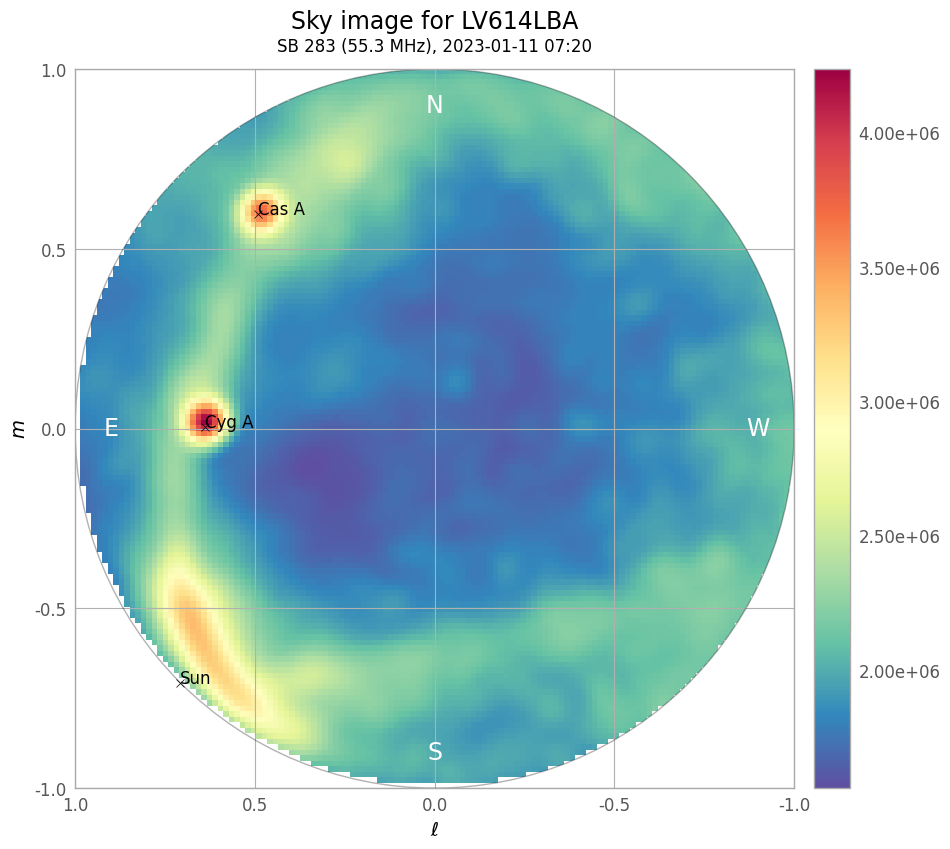

In [8]:
sky_fig

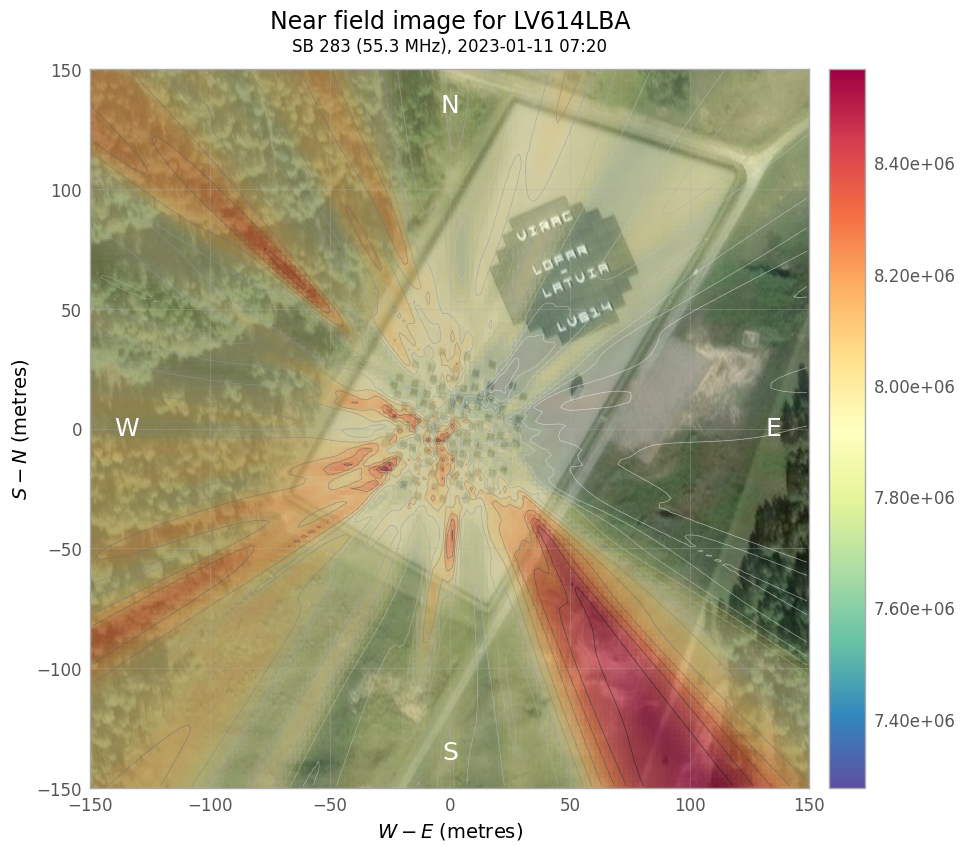

In [9]:
ground_fig


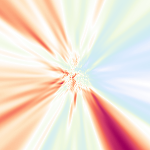

In [10]:
leaflet_map